# **Density-based spatial clustering (DBSCAN)**

DBSCAN documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

(200, 2) (50, 2)


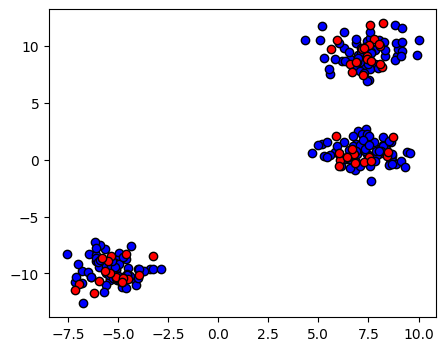

In [3]:
X, _ = make_blobs(n_samples = 250, n_features = 2, random_state=8)

# Train test splits
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

_, ax = plt.subplots(figsize = (5,4))
ax.scatter( X_train[:, 0], X_train[:, 1], c = 'b', edgecolors='k')
ax.scatter( X_test[:, 0], X_test[:, 1], c = 'r', edgecolors='k')

plt.show()

In [4]:
dbscan = DBSCAN(eps= 2 , min_samples= 5 )

# Train DBSCAN
dbscan.fit(X_test)

DBSCAN(eps=2)

In [5]:
# Predictions
predictions = dbscan.labels_

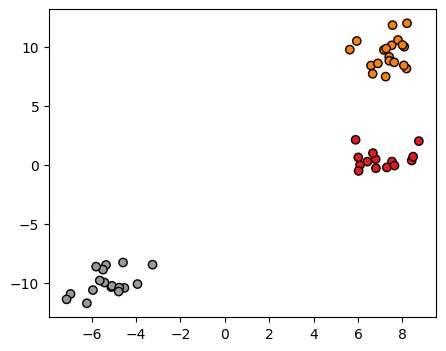

In [6]:
_, ax = plt.subplots(figsize = (5,4))
ax.scatter( X_test[:,0] , X_test[:,1] , c = predictions , edgecolors='k', cmap='Set1')

In [7]:
print(np.unique(predictions, return_counts=True))

(array([0, 1, 2]), array([14, 19, 17]))


# **DBSCAN on real data**

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [ ]:
_


plt.scatter( _ , _ )
print (X.shape, y.shape)

In [ ]:
dbscan = DBSCAN(eps= _ , min_samples= _ )
dbscan.fit( _ )

In [ ]:
predictions = _

In [ ]:
# Plot
_

# **DBSCAN on images**

Use any of the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [image2.png](https://drive.google.com/file/d/1RxivIbgi2eAG6p1myuxQGJs2zhGEsH_4/view?usp=sharing)
 - [image3.jpg](https://drive.google.com/file/d/1Pc_C9B_vqIxkLFV90RWSlRxRcTN-yKqF/view?usp=sharing)

In [8]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

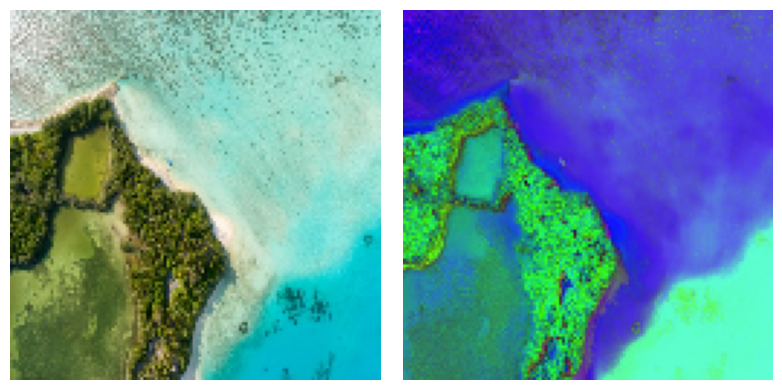

In [10]:
original_image = cv2.imread('/content/image1.jpeg')

# Convert from BGR Color Space to HSV
img_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
img_rgb = cv2.resize(img_rgb, (128,128))
img_hsv = cv2.resize(img_hsv, (128,128))

_, axes = plt.subplots (1, 2, figsize = (8,4))
axes[0].imshow( img_rgb ), axes[0].set_axis_off() #RGB
axes[1].imshow( img_hsv ), axes[1].set_axis_off() #HSV
plt.tight_layout()

In [23]:
# Vectorize to compute kmeans
vectorized_rgb = img_rgb.reshape([-1,3])
vectorized_rgb = np.float32(vectorized_rgb)

vectorized_hsv = img_hsv[:, :, 0].reshape([-1,1])
vectorized_hsv = np.float32(vectorized_hsv)

# Check both vector sizes
print(vectorized_rgb.shape, vectorized_hsv.shape)

(16384, 3) (16384, 1)


# **RGB image**

In [ ]:
dbscan = DBSCAN(eps= 25 , min_samples= 163 )
dbscan.fit( vectorized_rgb )

DBSCAN(eps=25, min_samples=163)

In [ ]:
# Predict to segment regions
predictions = dbscan.labels_
print(predictions.shape)

predictions = predictions.reshape(img_rgb.shape[:2])
print(predictions.shape)

(16384,)
(128, 128)


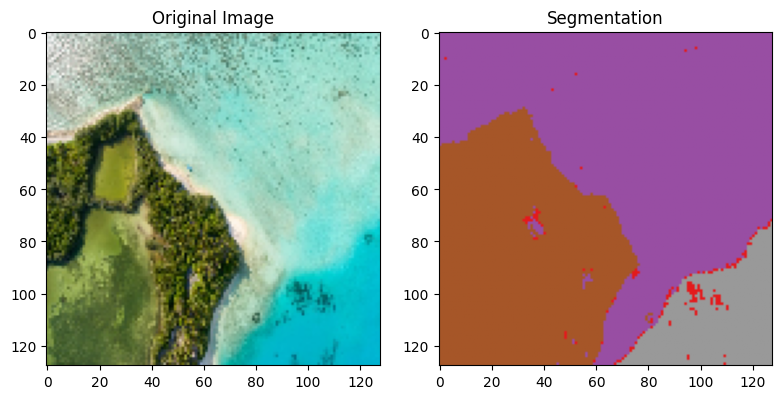

In [ ]:
_, axes = plt.subplots(1, 2, figsize = (8,4))
axes[0].imshow( img_rgb ), axes[0].set_title("Original Image")
axes[1].imshow( predictions, cmap= 'Set1'), axes[1].set_title("Segmentation")
plt.tight_layout()

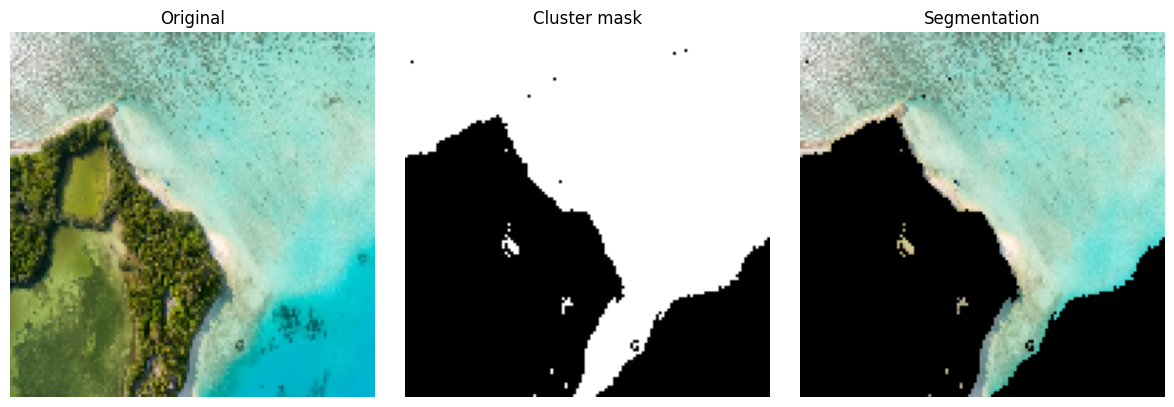

In [ ]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 0

cluster_mask = np.array ( predictions == cluster , dtype = np.uint8)

masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask)

_, axes = plt.subplots (1, 3, figsize = (12,4))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()

# **HSV image**

In [24]:
dbscan = DBSCAN(eps=0.08, min_samples=40)  # Ajustar estos parámetros según sea necesario
dbscan.fit(vectorized_hsv)

DBSCAN(eps=0.08, min_samples=40)

In [28]:
# Predict to segment regions
predictions = dbscan.labels_
print(predictions.shape)

predictions = predictions.reshape(img_hsv.shape[:2])
print(predictions.shape)
print(img_hsv.shape)
print(np.unique(predictions, return_counts=True))

(16384,)
(128, 128)
(128, 128, 3)
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71]), array([ 377,  264,  314,  386,  200,  135,  282,   73,   57,   86,  118,
        203,   58,   98,   71,   73,  605,  247,  654,  715, 1358,  381,
        458,   62,   75,  102,   88,   77,  139,  223,  562,   62,  235,
         58,   63,  305,   89,   51,  107,   54,  388,   61,   64,  167,
         93,  201,  297,  352,   65,  320,  311,   45,  129,  123,   79,
        300,  262,   49,  164,  204,  199,   90,   46,  297,  353,  358,
        262,  254,  247,  392,  164,  141,  342]))


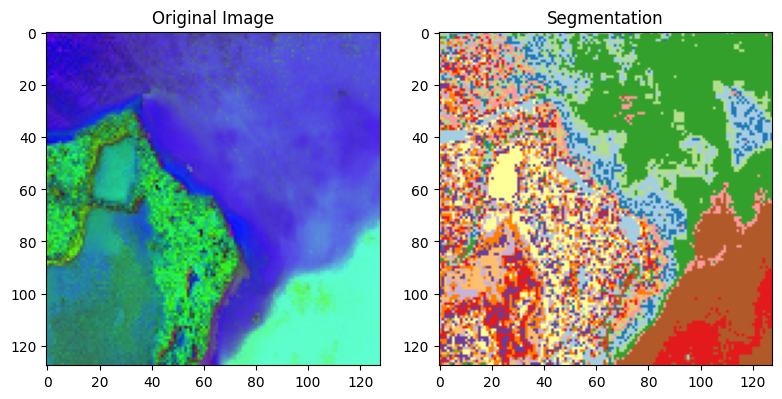

In [29]:
_, axes = plt.subplots(1, 2, figsize = (8,4))
axes[0].imshow( img_hsv ), axes[0].set_title("Original Image")
axes[1].imshow( predictions, cmap= 'Paired'), axes[1].set_title("Segmentation")
plt.tight_layout()

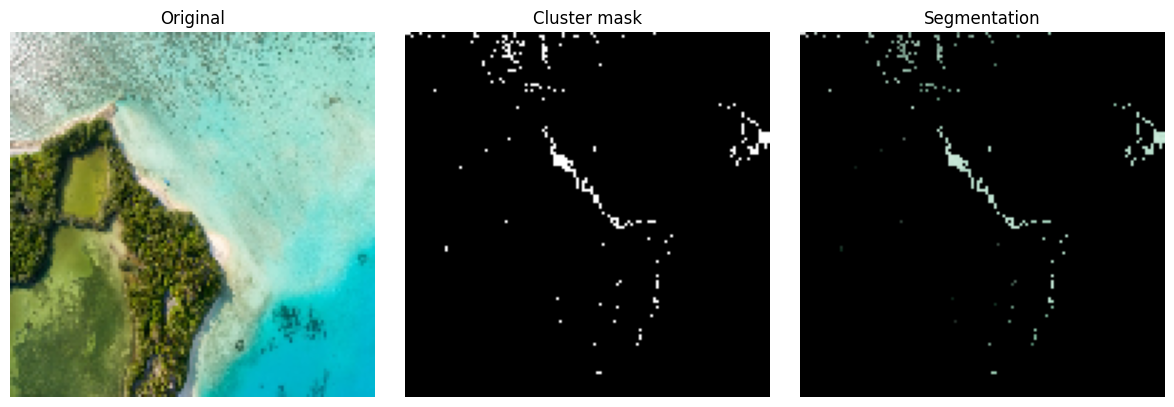

In [27]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 0

cluster_mask = np.array ( predictions == cluster , dtype = np.uint8)

masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask)

_, axes = plt.subplots (1, 3, figsize = (12,4))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()